# Proyecto Final: ¿Cómo puede hacer una empresa tecnología para el bienestar para tomar decisiones inteligentes?

### Autora: Carmen Witsman García
09/10/2024

En este caso práctico planteado en el `Curso de Análisis de Datos de Google`, analizaremos datos públicos recogidos por relojes inteligentes de distintas empresas, con el objetivo de **identificar patrones que ayuden a la empresa Bellabeat a mejorar sus dispositivos inteligentes**.

Bellabeat se trata de una empresa comprometida con la salud y bienestar de sus clientes. Para ello, cuenta con varios dispositivos de seguimiento que se conectan a su propia aplicación, lo que permite a sus clientes hacer un seguimiento de datos relacionados con su salud, como su actividad física o sueño.

En este análisis, responderemos las siguientes cuestiones:

- 1. ¿Cuáles son algunas tendencias de uso de los dispositivos inteligentes?

- 2. ¿Cómo se podrían aplicar estas tendencias a los clientes de Bellabeat?

- 3. ¿Cómo podrían ayudar estas tendencias a influir en la estrategia de marketing de Bellabeat?

## 1. Descripción de la tarea empresarial

El objetivo de este proyecto es **analizar los datos de uso de los dispositivos inteligentes** para saber cómo usan los consumidores los dispositivos inteligentes que no son de Bellabeat. 

Para estudiar la tendencia de uso de otros dispositivos inteligentes relacionados con la salud, nos centraremos en el análisis de relojes inteligentes de la empresa **Fitbit**.

Para ello, consultaremos la base de datos pública de Kaggle "FitBit Fitness Tracker Data", y extraeremos ficheros de datos que incluyen la siguiente información: `Actividad/día`, `Pasos/hora`, `Sueño/día`, `Peso/día`.

## 2. Preparación de los datos

Primero, limpiaremos los datos, identificando si hay valores nulos o inconsistencias.

In [2]:
# Establecemos directorio de trabajo
import os
os.chdir("C:/Users/witsm/Desktop/G_Analyrtics/Proyecto Final/CSV")

# Importamos los datos con la librería pandas
import pandas as pd
datos_actividad = pd.read_csv("dailyActivity_merged.csv")
datos_actividad.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
datos_actividad.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Vemos que ninguna de las variables presenta datos nulos. Realizaremos el mismo proceso para los datasets restantes.

In [4]:
# Importamos los datos con la librería pandas
import pandas as pd
datos_pasos = pd.read_csv("hourlySteps_merged.csv")
datos_sueño = pd.read_csv("sleepDay_merged.csv")
datos_peso = pd.read_csv("weightLogInfo_merged.csv")

# Vemos si hay valores faltantes
print(datos_pasos.isnull().sum())
print(datos_sueño.isnull().sum())
print(datos_peso.isnull().sum())

Id              0
ActivityHour    0
StepTotal       0
dtype: int64
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


Como la variable `Fat` presenta 65 datos nulos, la ignoraremos en este análisis, ya que podemos usar los datos de peso y calorías para evaluar la variación del estado físico de los clientes.

Pasaremos a ver si hay datos atípicos que puedan afectar al análisis.

In [5]:
# Identificamos datos atípicos

# Almacenamos solo los datos numéricos
datos_num = datos_actividad[datos_actividad.columns[2:]]

# Creamos un dataset con variables relevantes
datos_corr1 = datos_actividad[["Id", "Calories", "SedentaryMinutes", "TotalDistance"]]
datos_corr2 = datos_peso[["Id", "WeightKg"]]
datos_corr3 = datos_sueño[["Id", "TotalTimeInBed"]]
datos_corr4 = datos_pasos[["Id", "ActivityHour"]]

datos_corr5 = pd.merge(datos_corr1, datos_corr2, on = "Id")
datos_corr6 = pd.merge(datos_corr4, datos_corr3, on = "Id")

datos_corr_merge = pd.merge(datos_corr5, datos_corr6, on = "Id")

# Cambiamos formato de fecha/hora a solo hora
datos_corr_merge["ActivityHour"] = pd.to_datetime(datos_corr_merge['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
datos_corr_merge["ActivityHour"] = datos_corr_merge['ActivityHour'].dt.hour + datos_corr_merge['ActivityHour'].dt.minute / 60
datos_corr_merge

# Mostramos los casos atípicos de cada variable

# Iteramos sobre las columnas
for columna in datos_corr_merge.iloc[:,1:]:
    contador_atipicos = 0
    # Calculamos los cuartiles
    q25 = datos_corr_merge[columna].quantile(0.25)
    q75 = datos_corr_merge[columna].quantile(0.75)
    
    # Iteramos sobre los datos en cada columna
    for dato in datos_corr_merge[columna]:
        # Comparamos los valores para detectar los atípicos
        if dato > q75 or dato < q25:
            contador_atipicos += 1

    print(f"Atípicos en columna {columna}: {contador_atipicos} - Porcentaje del total: {contador_atipicos/24618718 * 100} %")


Atípicos en columna Calories: 11775456 - Porcentaje del total: 47.83131274341743 %
Atípicos en columna SedentaryMinutes: 11019898 - Porcentaje del total: 44.762273973811304 %
Atípicos en columna TotalDistance: 11666618 - Porcentaje del total: 47.38921823630296 %
Atípicos en columna WeightKg: 9142774 - Porcentaje del total: 37.137490262490516 %
Atípicos en columna ActivityHour: 11267578 - Porcentaje del total: 45.76833773391449 %
Atípicos en columna TotalTimeInBed: 11887020 - Porcentaje del total: 48.28448012605693 %


Observamos que para cada variable existe un gran porcentaje de datos atípicos, de entre un 40% y 50%.

Esto sucede debido a la sensibilidad con la que fueron medidos los datos, pues estamos hablando de casi 25 millones de datos recogidos en escalas amplias como calorías o minutos.

## 3. Análisis 

Comenzaremos calculando la media de las distintas variables para cada usuario registrado.

                        Id  Calories  SedentaryMinutes  TotalDistance  \
Id                1.000000 -0.005412         -0.379437       0.028012   
Calories         -0.005412  1.000000          0.092069       0.663465   
SedentaryMinutes -0.379437  0.092069          1.000000      -0.187896   
TotalDistance     0.028012  0.663465         -0.187896       1.000000   
WeightKg         -0.164103  0.376068          0.236418      -0.194249   
ActivityHour     -0.001899 -0.000192          0.000533      -0.000037   
TotalTimeInBed    0.256976  0.012078         -0.244208       0.015954   

                  WeightKg  ActivityHour  TotalTimeInBed  
Id               -0.164103     -0.001899        0.256976  
Calories          0.376068     -0.000192        0.012078  
SedentaryMinutes  0.236418      0.000533       -0.244208  
TotalDistance    -0.194249     -0.000037        0.015954  
WeightKg          1.000000     -0.000045       -0.015003  
ActivityHour     -0.000045      1.000000       -0.000277  
To

<Axes: >

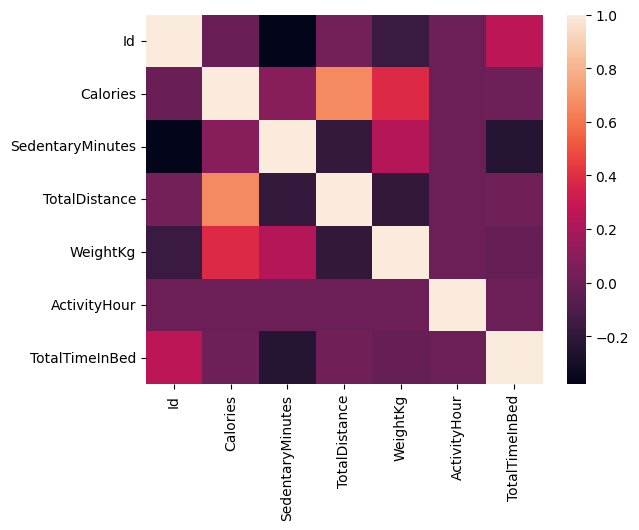

In [15]:
import seaborn as sns
matriz_corr = datos_corr_merge.corr()
print(matriz_corr)
sns.heatmap(matriz_corr)

In [6]:
# Agrupamos el dataset por la variable Id y calculamos las medias

medias = datos_corr_merge.groupby('Id').mean().reset_index()
medias


,Id,Calories,SedentaryMinutes,TotalDistance,WeightKg,ActivityHour,TotalTimeInBed
0,1503960366,1816.419355,848.161290,7.809677,52.599998,11.456067,383.200000
1,1927972279,2172.806452,1317.419355,0.634516,133.500000,11.413043,437.800000
2,4319703577,2037.677419,735.806452,4.892258,72.350002,11.444751,501.961538
3,4558609924,2033.258065,1093.612903,5.080645,69.639999,11.413043,140.000000
4,5577150313,3359.633333,754.433333,6.213333,90.699997,11.398305,460.615385
5,6962181067,1982.032258,662.322581,6.585806,61.553334,11.401639,466.129032


In [13]:
# Usamos la librería seaborn para hacer un mapa de calor de correlaciones
import seaborn as sns
# Creamos la matriz de correlación
matriz_corr = medias.corr()
matriz_corr

,Id,Calories,SedentaryMinutes,TotalDistance,WeightKg,ActivityHour,TotalTimeInBed
Id,1.000000,0.341771,-0.608558,0.325725,-0.289498,-0.646973,0.103399
Calories,0.341771,1.000000,-0.160880,0.009377,0.346932,-0.567278,0.236981
SedentaryMinutes,-0.608558,-0.160880,1.000000,-0.795663,0.702800,-0.089365,-0.448001
TotalDistance,0.325725,0.009377,-0.795663,1.000000,-0.906575,0.243894,-0.038788
WeightKg,-0.289498,0.346932,0.702800,-0.906575,1.000000,-0.397629,0.198493
ActivityHour,-0.646973,-0.567278,-0.089365,0.243894,-0.397629,1.000000,0.060249
TotalTimeInBed,0.103399,0.236981,-0.448001,-0.038788,0.198493,0.060249,1.000000


De aquí podemos hacernos varias preguntas:

**1- ¿El usuario que ha pasado más tiempo en la cama es el más sedentario?**

No. Como podemos ver en el resumen numérico, el que más tiempo pasa en la cama de media al día (502 mins, es decir, 8 h 37 mins), pasa de media unas 12h30 sedentarias, lo que es menos que la media general. Es la segunda persona que más se mueve durante el día. El primer puesto lo supera por 1h30 más de movimiento, durmiendo una media de 7h 45mins al día.

**2- ¿Los usuarios que más calorías queman, son los que más distancia recorren?**

El usuario que quema más calorías (+3.000 cal/día de media) recorre unos 6km al día de media, ocupando el tercer puesto del usuario que más distanca recorre. Esto podría indicar que combina caminar con ejercicio físico como pesas, flexiones o pilates. El segundo usuario que más calorías quema recorre unos 5km de media al día.

**3- ¿El peso está positivamente correlacionado con las calorías quemadas?**

En el caso de la persona que presenta más peso, es la que menos se mueve (solo 2h al día, en total 63 metros de media). Para este caso tendríamos que analizar el índice de masa corporal para saber el estado de su salud, y así tomarlo en cuenta para los informes. En los demás casos, la relación de peso-calorías se mantiene equilibrada, los que pesan entre 50 y 70 kilogramos queman alrededor de 2000 calorías diarias. Sin embargo, hay otro caso atípico, el usurario de 90 kilogramos de peso quema unas 3.500 calorías diarias de media.

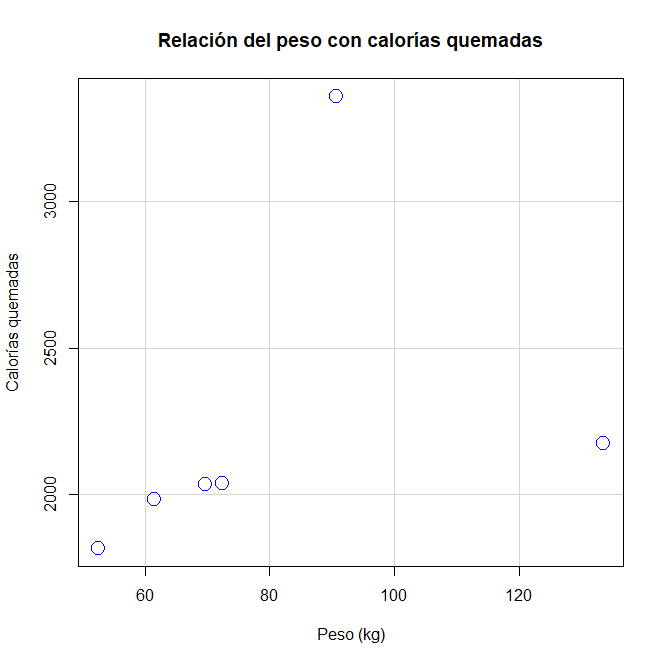

**4- ¿Cuál es la hora más activa de los usuarios?**

Elaborando un histograma a partir del conjunto de datos de "hourlyCalories_merged.csv", vemos que la hora más activa de los usuarios en general es de 4pm a 6pm. Aun así, los usuarios se mueven durante todo el día, especialmente desde las 6am hasta las 8pm.

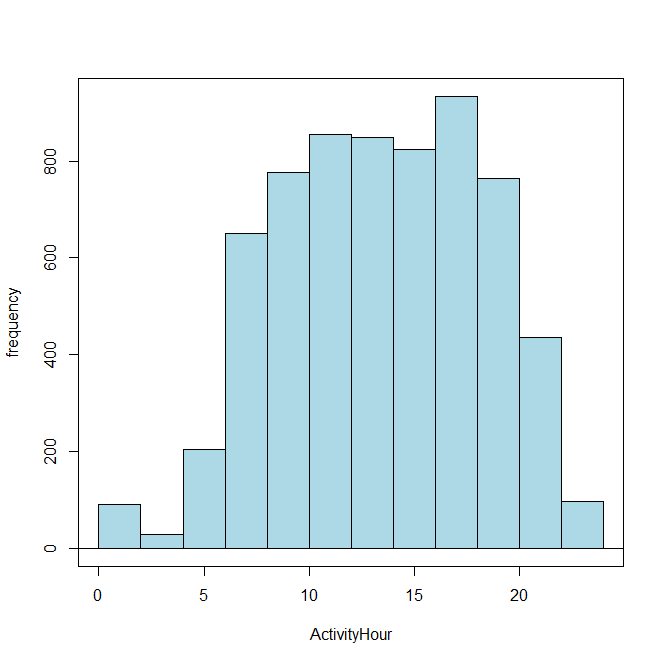 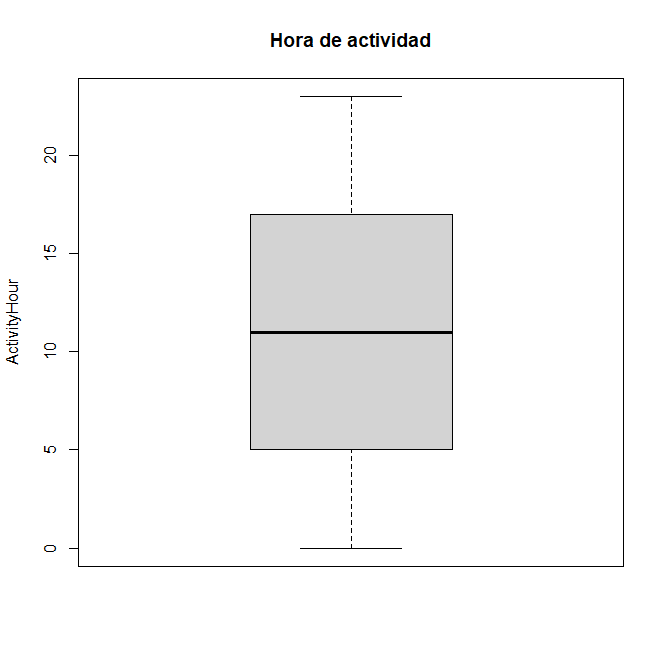

**5- ¿Qué diferencia hay entre las horas de actividad de las personas con sobrepeso y las personas de peso normal?**

Elaboramos otros histogramas para comparar las horas de actividad de los usuarios con sobrepeso (en color rosa pastel) y los de peso normal (en color azul) 

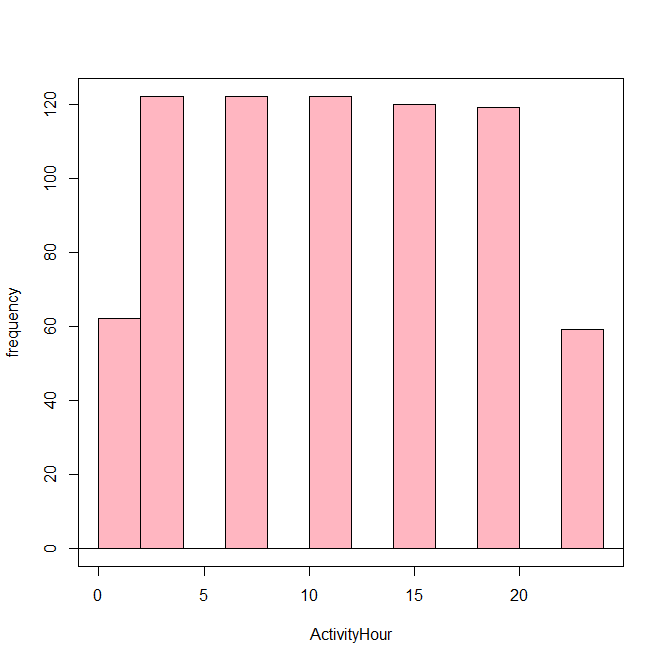 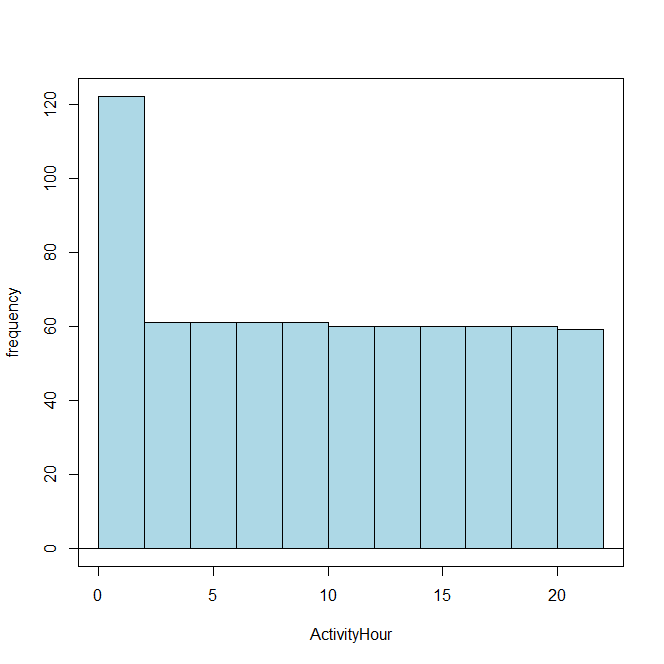

Hay una clara diferencia en la continuidad de la actividad a lo largo del día entre estos dos grupos de personas. Los que se mantienen activos durante el día son aquellas personas que no tienen sobrepeso, y su hora más activa es entre las 12am y las 1am. Debido a la falta de datos de un grupo mayor de personas, no podemos sacar ninguna conclusión fiable acerca de ese tramo horario de actividad. 

Por otro lado, las personas con sobrepeso parecen descansar entre intervalos de movimiento. 

Pasamos a ver la diferencia en las horas favoritas para andar, que las consideraremos aquellas en las que los usuarios queman más de 100 calorías.

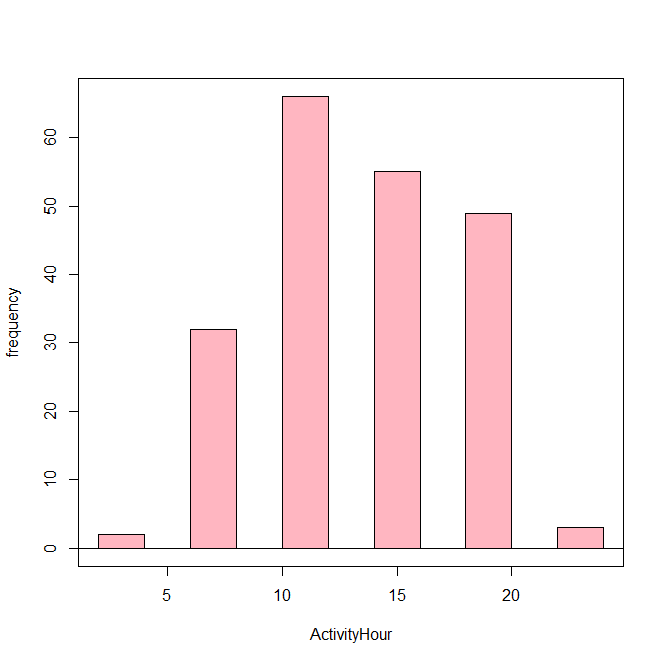 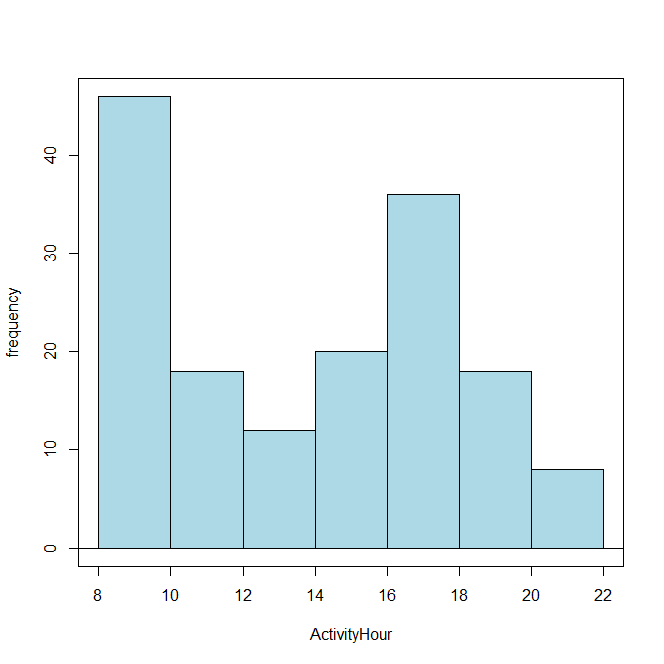




Vemos el mismo patrón de continuidad en el movimiento, solo que esta vez vemos que los usuarios sin sobrepeso suelen andar más entre las 8 y 10 de la mañana, mientras que las personas con sobrepeso lo hacen entre las 10 y las 11 de la mañana.

Consideraremos que los usuarios hacen una actividad física intensa cuando queman más de 450 calorías en 1 hora en el caso de los que presentan sobrepeso, y 250 calorías en el otro caso. Elaboramos los histogramas para ver las diferencias. Rojo = sobrepeso, Azul = peso normal.

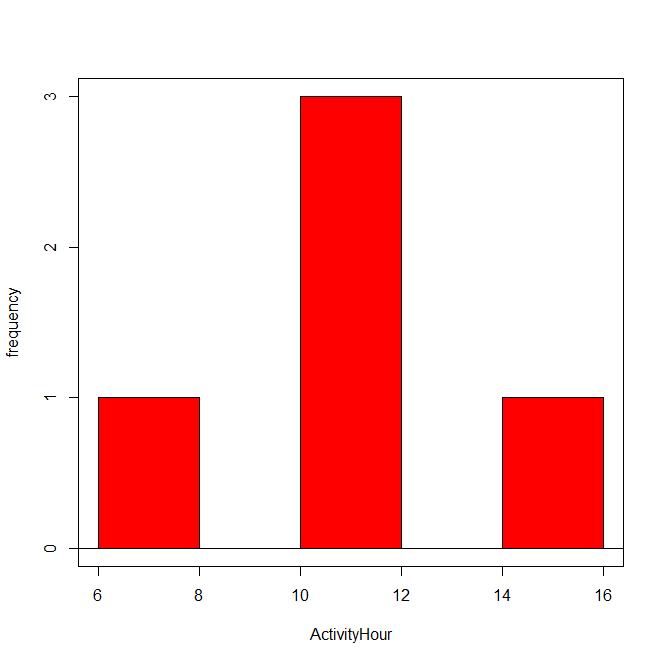 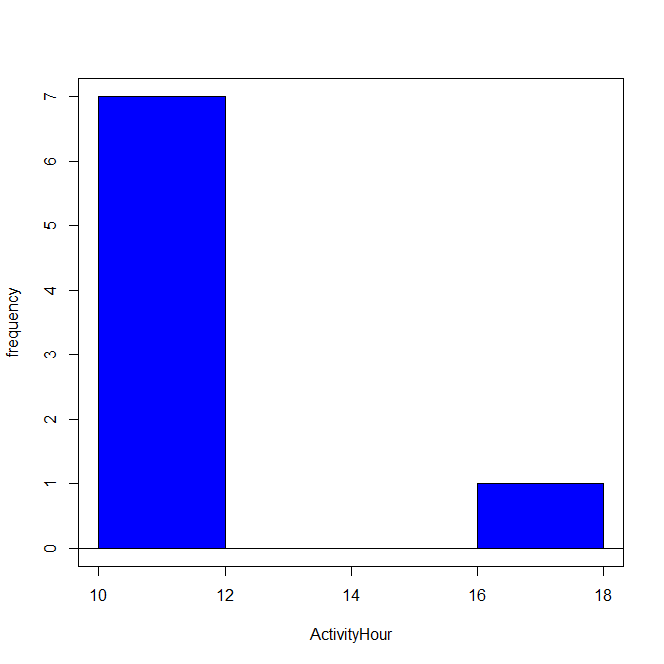



A pesar de ser más las personas con sobrepeso, son las que menos actividad física intensa hacen. En los pocos casos en los que la hacen, la mayoría es entre las 10 y las 12, así como las personas con peso normal.

- ¿Cuál es el IMC de los usuarios?

In [7]:
# Importamos los datos del conjunto de datos "weightLogInfo_merged"
datos_imc = pd.read_csv("weightLogInfo_merged.csv")
# Filtramos por Id y IMC (BMI en inglés)
datos_imc = datos_imc[["Id", "BMI"]]
# Calculamos la media de IMC para cada usuario
datos_imc_usuarios = datos_imc.groupby("Id").mean().reset_index()
datos_imc_usuarios


,Id,BMI
0,1503960366,22.650000
1,1927972279,47.540001
2,2873212765,21.570001
3,4319703577,27.415000
4,4558609924,27.214000
5,5577150313,28.000000
6,6962181067,24.028000
7,8877689391,25.487083


In [8]:
# Filtramos por los usuarios con sobrepeso
datos_imc_usuarios_sobrepeso = datos_imc_usuarios[datos_imc_usuarios["BMI"]>=25]
datos_imc_usuarios_sobrepeso

,Id,BMI
1,1927972279,47.540001
3,4319703577,27.415000
4,4558609924,27.214000
5,5577150313,28.000000
7,8877689391,25.487083


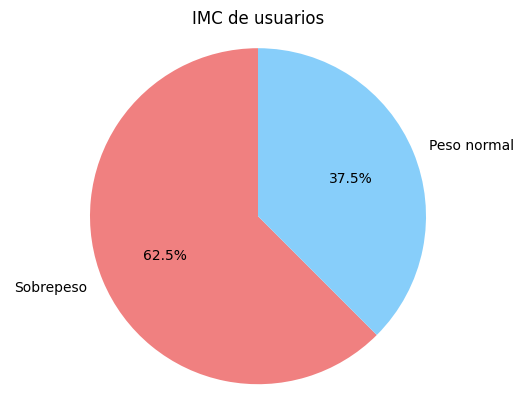

In [10]:
# Gráfico
import matplotlib.pyplot as plt
# Crear una serie con el número de individuos en cada categoría
bmi_counts = pd.Series({
    'Sobrepeso': (datos_imc_usuarios['BMI'] >= 25).sum(),
    'Peso normal': (datos_imc_usuarios['BMI'] < 25).sum()
})
# Creamos el gráfico de tarta
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

# Aseguramos que el gráfico sea circular
plt.axis('equal')

# Mostramos el gráfico
plt.title("IMC de usuarios")
plt.show()


Como vemos, 5 de las 8 personas en este _dataset_ presentan algún tipo de sobrepeso, eso constituye un 62.5% de los usuarios en este estudio. 1 de estas personas sufre de obesidad mórbida. Nos damos cuenta de que la persona que más se mueve, resulta tener sobrepeso.

No hay una forma de analizar la evolución de este IMC porque no disponemos de los datos suficientes en un largo periodo de tiempo.

Ahora veremos el resumen numérico general.

In [6]:
# Seleccionamos las columnas relevantes
selected_columns = datos_corr_merge[['ActivityHour', 'Calories', 'SedentaryMinutes', 'TotalDistance', 'TotalTimeInBed', 'WeightKg']]

# Calculamos las estadísticas
summary_stats = selected_columns.describe(percentiles=[0, 0.25, 0.5, 0.75, 1]).T

# Calculamos rango intercuartílico (IQR)
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Mostramos solo las estadísticas solicitadas: mean, std, IQR, y los percentiles
summary_stats_filtered = summary_stats[['mean', 'std', 'IQR', 'min', '25%', '50%', '75%', 'max']]

print(summary_stats_filtered)

                         mean         std         IQR        min          25%  \
ActivityHour        11.406382    6.921237   12.000000   0.000000     5.000000   
Calories          2010.166868  380.316109  323.000000   0.000000  1850.000000   
SedentaryMinutes   689.289975  168.249023   97.000000   0.000000   634.000000   
TotalDistance        6.489963    2.671038    4.440000   0.000000     3.910000   
TotalTimeInBed     456.272949   89.111624   73.000000  65.000000   424.000000   
WeightKg            62.835555    7.224151    0.700001  52.599998    61.200001   

                      50%          75%      max  
ActivityHour        11.00    17.000000    23.00  
Calories          2039.00  2173.000000  4552.00  
SedentaryMinutes   683.00   731.000000  1440.00  
TotalDistance        6.82     8.350000    13.24  
TotalTimeInBed     457.00   497.000000   775.00  
WeightKg            61.50    61.900002   133.50  


De aquí podemos concluir que, de media diaria, los usuarios:

- Queman unas 2000 calorías
- Pesan unos 60 kilogramos
- Duermen entre 7 y 8 horas
- Están activos la mitad del día, por lo que pasan unas 4h sin realizar actividad física
- Suelen despertarse a las 5am y acostarse a las 5pm 
- Andan unos 6.5 kilómetros

Por último, veremos cuál ha sido la tendencia en la quema de calorías a lo largo del uso de Fitbit para cada uno de los 6 usuarios. 

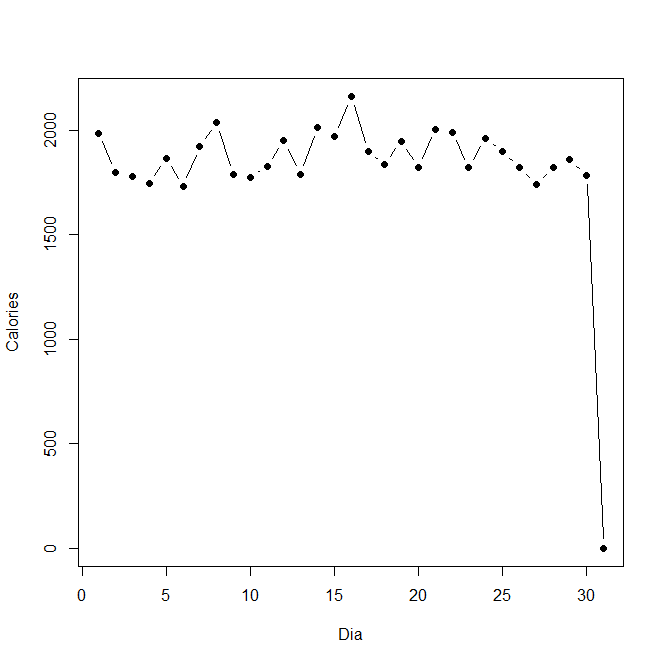 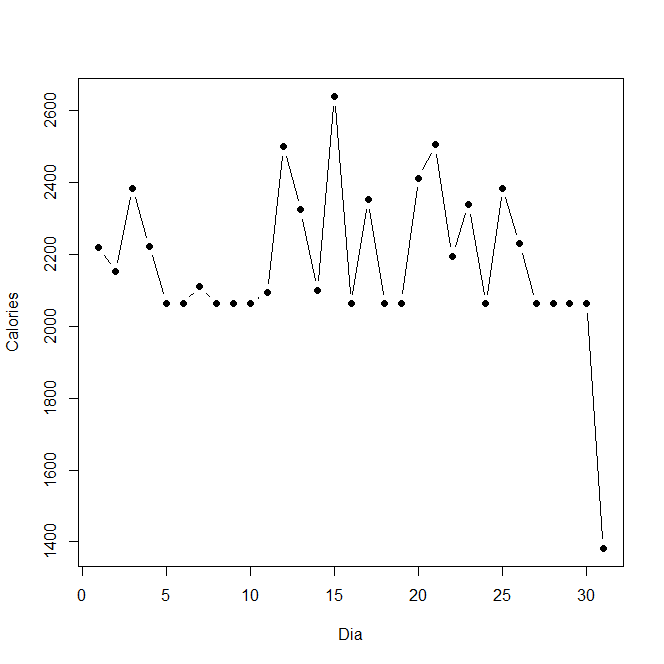 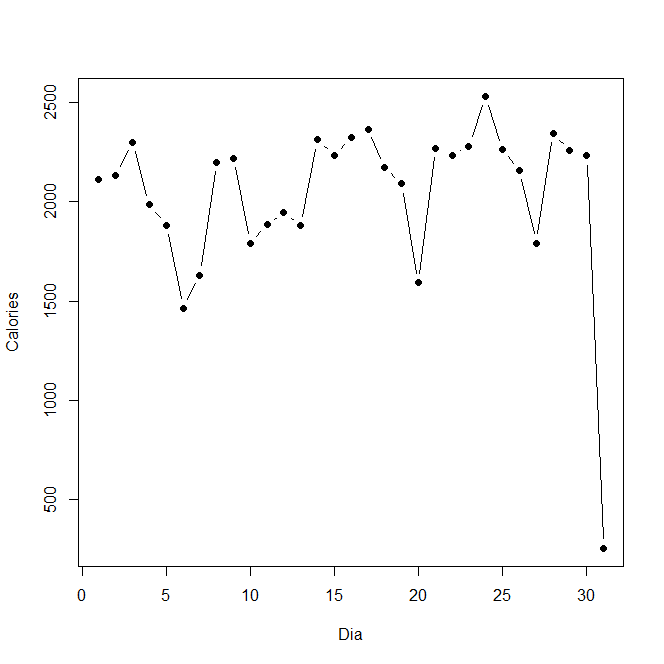 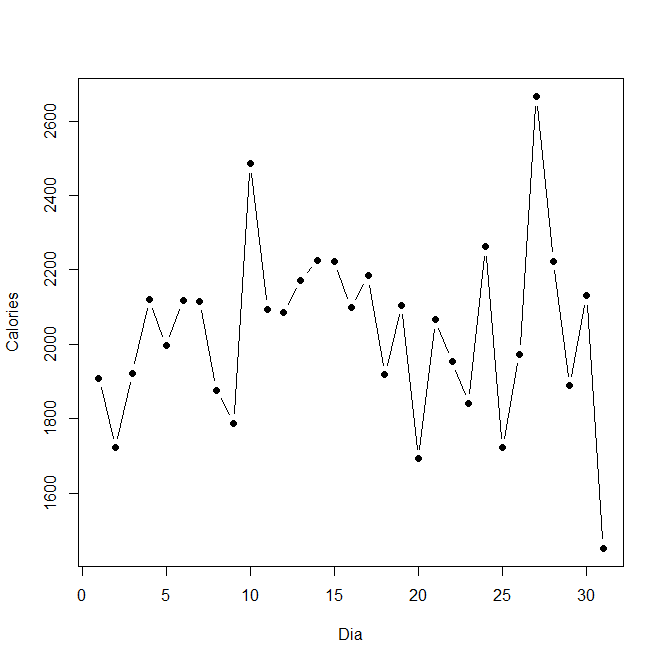 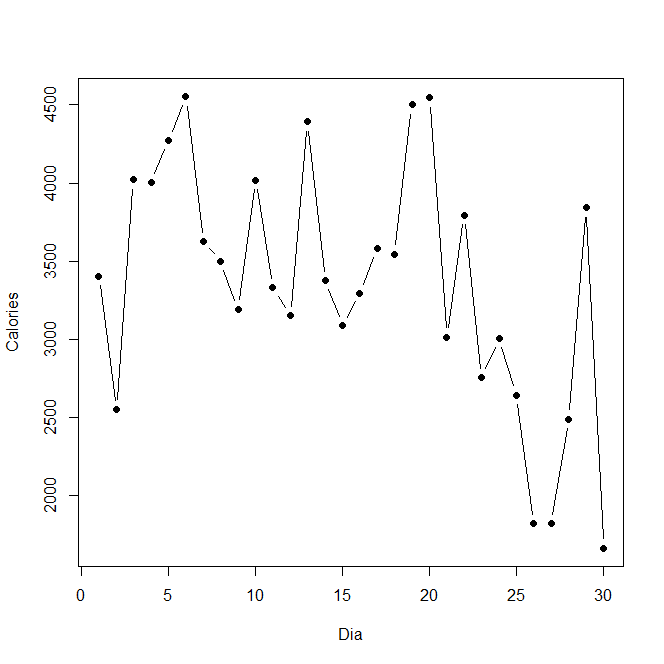 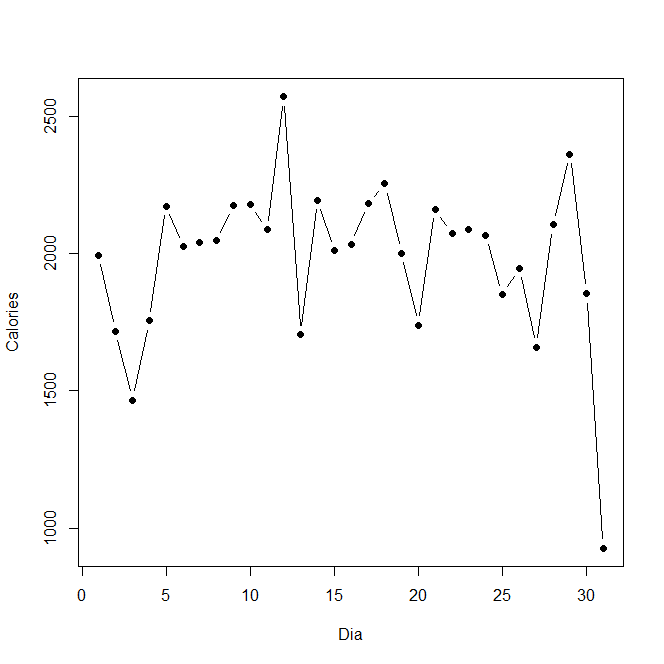

Al mirar los datos más de cerca, me doy cuenta de que en los conjuntos de datos, cuando hay días en los que el usuario no da ningún paso, se introduce la media de calorías que quema. Esto podría ser para no dar datos falsos o erróneos sobre el peso cuando el usuario se quita su dispositivo inteligente. 

En el caso de este conjunto de datos, hay una persona que se quitó 1 día el reloj, otra persona que se lo quitó 14 días, y una última que no lo utilizó por 2 días.